# Simulation of Double Pendulum 

## Euler's Method 

In [2]:
'''
Double Pendulum Simulation
Euler's Method
PHY-390: Indepedendent Study
'''

import numpy as np
import math
import matplotlib.pyplot as plt

def Eulers(mass1,mass2,len1,len2,angle_1,angle_2):

#Definition of variables

    g = 9.8
    total_mass = mass1 + mass2
    m2_l1_l2 = mass2*len1*len2

#Creation of time array

    time = 10
    number_points = 30000
    time_array = np.linspace(0, time, num=number_points)
    delta_t = time_array[1] - time_array[0]

#Creation of angle array
 
    angle1_array = np.zeros(number_points)
    angle2_array = np.zeros(number_points)

#Creation of velocity array

    velocity1_array = np.zeros(number_points)
    velocity2_array = np.zeros(number_points)

#Creation of acceleration array

    acceleration1_array = np.zeros(number_points)
    acceleration2_array = np.zeros(number_points)

#Initial velocity and acceleration

    velocity_1 = velocity1_array[0]
    velocity_2 = velocity2_array[0]

    acceleration_1 = acceleration1_array[0]
    acceleration_2 = acceleration2_array[0]

#For loop begins
   
    for i in range(number_points):

        dif_angles = angle_1 - angle_2
        
        #Equations for elements A B C D E
        
        A = mass1*(pow(len1,2)) + mass2*(pow(len1,2))
        B = m2_l1_l2*(np.cos(dif_angles))
        C = m2_l1_l2*(np.sin(dif_angles))*(pow(velocity_2,2)) + total_mass*g*len1*(np.sin(angle_1))
        D = mass2*(pow(len2,2))
        E = mass2*g*len2*(np.sin(angle_2)) - (m2_l1_l2*(np.sin(dif_angles))*pow(velocity_1,2))

        
        #Differential equations of theta double-dot1 and theta double-dot 2

        acceleration_1 = ((A*B*E - pow(B,2)*C) / (pow(A,2)*D - A*B)) - (C/A)
        acceleration1_array[i] = acceleration_1

        acceleration_2 = (B*C + A*E) / (D*A - B)
        acceleration2_array[i] = acceleration_2

        #Equations for velocities

        velocity_1 = velocity_1 + acceleration_1*delta_t
        velocity1_array[i] = velocity_1

        velocity_2 = velocity_2 + acceleration_2*delta_t
        velocity2_array[i] = velocity_2

        #Equations for Angles

        angle_1 = angle_1 + velocity_1*delta_t + (1/2)*acceleration_1*pow(delta_t,2)
        angle1_array[i] = angle_1

        angle_2 = angle_2 + velocity_2*delta_t + (1/2)*acceleration_2*pow(delta_t,2)
        angle2_array[i] = angle_2

    #print("Last time point is " + str(time_array[-1]))
    #print("Last angle 1 point is " + str(round(angle1_array[-1],5)))
    #print("Last angle 2 point is " + str(round(angle2_array[-1],5)))

#Creation of Plots 

    fig1 = plt.figure()
    ax1a = fig1.add_subplot(311)
    ax1a.plot(time_array, angle1_array)
    ax1a.set_title("Angle 1 vs time")
    ax1b = fig1.add_subplot(312)
    ax1b.plot(time_array, velocity1_array)
    ax1b.set_title("Velocity 1 vs time")
    ax1c = fig1.add_subplot(313)
    ax1c.plot(time_array, acceleration1_array)
    ax1c.set_title("Acceleration 1 vs time")

    fig2 = plt.figure()
    ax2a = fig2.add_subplot(311)
    ax2a.plot(time_array, angle2_array)
    ax2a.set_title("Angle 2 vs time")
    ax2b = fig2.add_subplot(312)
    ax2b.plot(time_array, velocity2_array)
    ax2b.set_title("Velocity 2 vs time")
    ax2c = fig2.add_subplot(313)
    ax2c.plot(time_array, acceleration2_array)
    ax2c.set_title("Acceleration 2 vs time")

    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111)
    ax3.plot(angle1_array,angle2_array)
    ax3.set_title("Angle 1 vs. Angle2")

    plt.show()



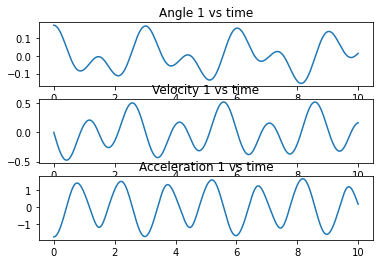

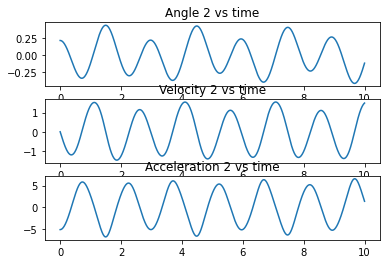

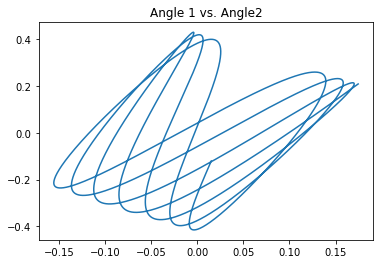

In [3]:
Eulers(0.5,0.2,1,0.7,(math.pi)/18,(math.pi)/15)

## Stability of the code as we increase angle_2 while holding angle_1 constant.
At angle_2 = 45 degrees the behaviour is still reasonable.

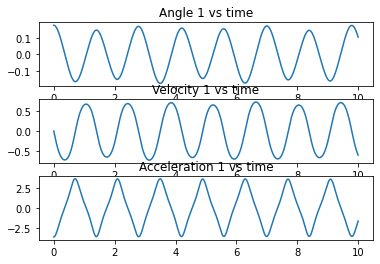

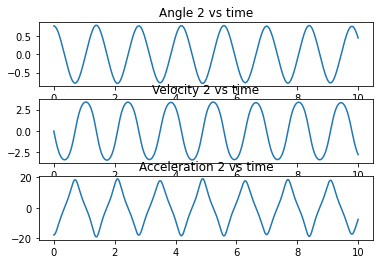

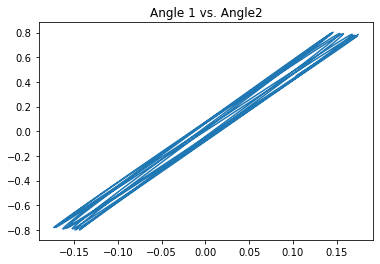

In [29]:
Eulers(0.5,0.2,1,0.7,(math.pi)/18,(math.pi)/4)

At angle_2 = 67 degrees the behaviour does not make sense

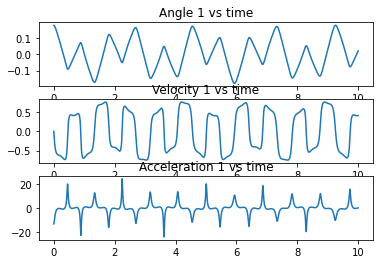

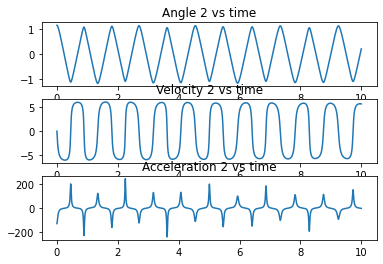

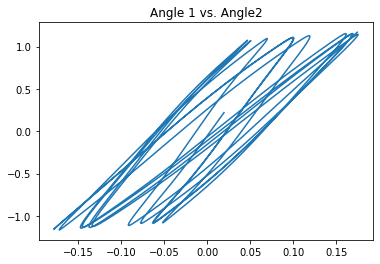

In [38]:
Eulers(0.5,0.2,1,0.7,(math.pi)/18,1.17)

## Stability of the code as we increase angle_1 while holding angle_2 constant.
At angle_1 = 25 degrees the behaviour is still somewhat reasonable.

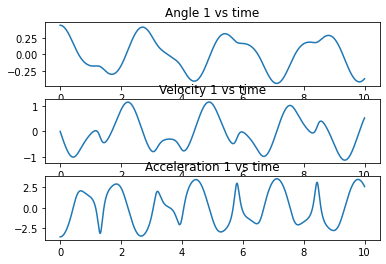

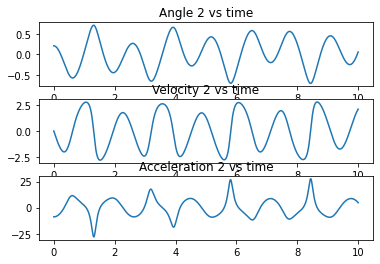

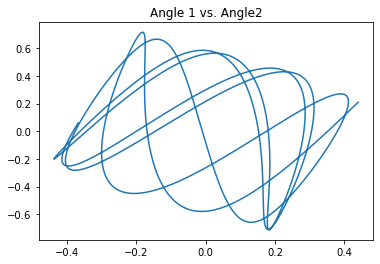

In [44]:
Eulers(0.5,0.2,1,0.7,0.44,(math.pi)/15)

At angle_1 = 36 degress the behaviour does not make sense

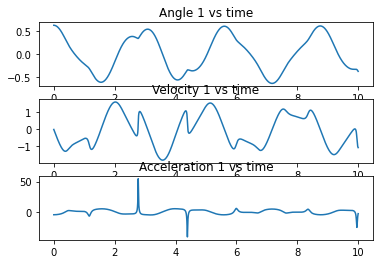

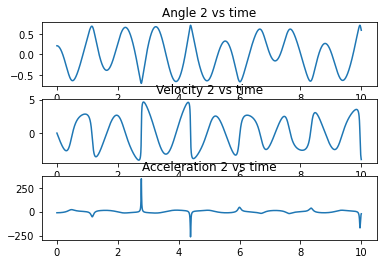

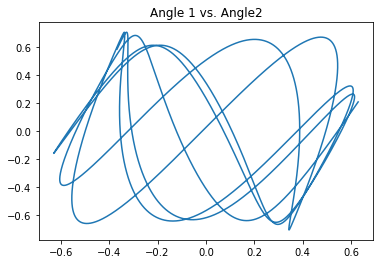

In [49]:
Eulers(0.5,0.2,1,0.7,(math.pi)/5,(math.pi)/15)